![Quora-1.png](attachment:Quora-1.png)

<h1 style="text-align:center;font-size:30px;" > Quora Question Pairs </h1>

<h1> 1. Business Problem </h1>

### https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb

<h2> 1.1 Description </h2>

<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle 


### Mapping problem to a Machine Learning Problem

### Example --> Data point 

we have bunch of entries where yi(is_duplicate) is a binary variable(0,1)  , so basically this is my binary classification problem.. it means considering q1 & q2 very first we have to featurize it & then we have to predict whether they are similar or not !


### Splitting your data

__ Problem Statement __
- Identify which questions asked on Quora are duplicates of questions that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether a pair of questions are duplicates or not. 

<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<h2>1.3 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high.
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not. </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

<h1>3. Exploratory Data Analysis </h1>

<h2> 3.1 Reading data and basic stats </h2>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:

df=pd.read_csv(r"G:\Machine Learning\Projects\Quora\Raw_data/train.csv")

print("Number of data points " , df.shape[0])


Number of data points  404290


In [7]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [8]:
## to get high level view / idea about your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


We are given a minimal number of data fields here, consisting of:

- id:  Looks like a simple rowID
- qid{1, 2}:  The unique ID of each question in the pair
- question{1, 2}:  The actual textual contents of the questions.
- is_duplicate:  The label that we are trying to predict - 

     whether the two questions are duplicates of each other.

<h3> 3.2.1 Distribution of data points among output classes</h3>
- Number of duplicate(smilar) and non-duplicate(non similar) questions

<AxesSubplot:>

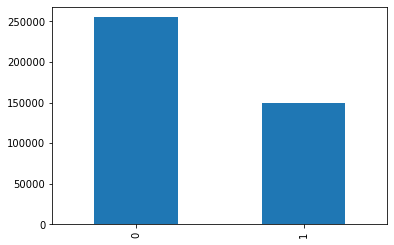

In [9]:
df['is_duplicate'].value_counts().plot(kind='bar')

## df.groupby("is_duplicate")['id'].count().plot.bar()

In [10]:
print('Total number of question pairs for training:\n {}'.format(len(df)))

Total number of question pairs for training:
 404290


In [11]:
len(df[df['is_duplicate']==0])/len(df)*100

63.08021469737069

In [12]:
print(' Question pairs are not Similar (is_duplicate = 0) {} %'.\
      format(np.round(len(df[df['is_duplicate']==0])/len(df)*100),2))
print(' Question pairs are Similar (is_duplicate = 1)  {} %'.\
      format(np.round(len(df[df['is_duplicate']==1])/len(df)*100),2))

 Question pairs are not Similar (is_duplicate = 0) 63.0 %
 Question pairs are Similar (is_duplicate = 1)  37.0 %


<h3> 3.2.2 Number of unique questions </h3>

In [13]:
### very first combine qid1 & qid2 , then call unique 

In [14]:
len(df['qid1'].tolist())

404290

In [15]:
len(df['qid2'].tolist())

404290

In [16]:
## total questions
len(df['qid1'].tolist() + df['qid2'].tolist())

808580

In [17]:
df['qid1'].tolist() + df['qid2'].tolist()

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 129,
 131,
 133,
 135,
 137,
 139,
 141,
 143,
 145,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 163,
 165,
 167,
 169,
 171,
 173,
 175,
 177,
 179,
 181,
 183,
 185,
 187,
 189,
 191,
 193,
 195,
 197,
 199,
 201,
 203,
 205,
 207,
 209,
 211,
 213,
 215,
 217,
 219,
 221,
 223,
 225,
 227,
 229,
 231,
 233,
 235,
 237,
 239,
 241,
 243,
 245,
 247,
 249,
 251,
 253,
 255,
 257,
 259,
 261,
 263,
 265,
 267,
 269,
 271,
 273,
 275,
 277,
 279,
 281,
 283,
 285,
 287,
 289,
 291,
 293,
 295,
 297,
 299,
 301,
 303,
 305,
 307,
 309,
 311,
 313,
 315,
 317,
 319,
 321,
 323,
 325,
 327,
 329,
 331,
 333,
 335,
 337,
 339,
 341,
 343,
 345,
 347,
 349,
 351,

In [18]:
## total unique questions
len(np.unique(df['qid1'].tolist() + df['qid2'].tolist()))


537933

### Alternative to find total unique questions

In [19]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())


In [20]:
qids

0              1
1              3
2              5
3              7
4              9
           ...  
808575    379845
808576    155606
808577    537929
808578    537931
808579    537933
Length: 808580, dtype: int64

In [21]:
unique_qs = len(np.unique(qids))
unique_qs

537933

#### Number of unique questions that appear more than one time

In [22]:
qids.value_counts() > 1

2559       True
30782      True
4044       True
2561       True
14376      True
          ...  
212185    False
210136    False
214230    False
220373    False
2047      False
Length: 537933, dtype: bool

In [23]:
qs_morethan_onetime=np.sum(qids.value_counts() > 1)

In [24]:
qs_morethan_onetime

111780

In [25]:
print ('Number of unique questions that appear more than one time:\
{} in the form of % -- {} % '.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

Number of unique questions that appear more than one time: 111780 in the form of % -- 20.77953945937505 % 


### Max number of times a single question is repeated

In [26]:
qids.value_counts()

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
212185      1
210136      1
214230      1
220373      1
2047        1
Length: 537933, dtype: int64

### plot Repreated & unique questions

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\mcr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Plot representing unique and repeated questions ')

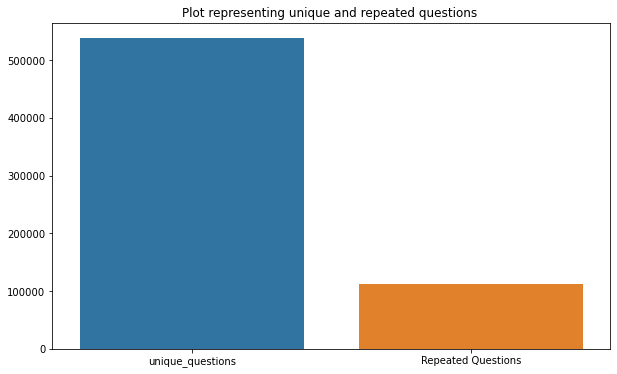

In [28]:
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
sns.barplot(x,y)
plt.title ("Plot representing unique and repeated questions")

<h3>3.2.3 Checking for Duplicates </h3>

In [29]:
df.groupby(['qid1','qid2']).count()

id  question1  question2  is_duplicate
qid1   qid2                                          
1      2        1          1          1             1
3      4        1          1          1             1
       282170   1          1          1             1
       380197   1          1          1             1
       488853   1          1          1             1
...            ..        ...        ...           ...
537924 537925   1          1          1             1
537926 537927   1          1          1             1
537928 537929   1          1          1             1
537930 537931   1          1          1             1
537932 537933   1          1          1             1

[404290 rows x 4 columns]

In [30]:
df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count()

is_duplicate
qid1   qid2                
1      2                  1
3      4                  1
       282170             1
       380197             1
       488853             1
...                     ...
537924 537925             1
537926 537927             1
537928 537929             1
537930 537931             1
537932 537933             1

[404290 rows x 1 columns]

In [31]:
#checking whether there are any repeated pair of questions
pair_duplicates=df[['qid1','qid2','is_duplicate']].\
                groupby(['qid1','qid2']).count()

pair_duplicates

is_duplicate
qid1   qid2                
1      2                  1
3      4                  1
       282170             1
       380197             1
       488853             1
...                     ...
537924 537925             1
537926 537927             1
537928 537929             1
537930 537931             1
537932 537933             1

[404290 rows x 1 columns]

In [32]:
print("Number of duplicate questions",pair_duplicates.shape[0]-df.shape[0])

## bcz if pair_duplicate shape - df shape diff is 1 , 
#it means we have 1 duplicate pair..

Number of duplicate questions 0


<h3> 3.2.4 Number of occurrences of each question </h3>

In [33]:
qids.value_counts()

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
212185      1
210136      1
214230      1
220373      1
2047        1
Length: 537933, dtype: int64

(array([4.26153e+05, 6.47670e+04, 2.12260e+04, 9.34500e+03, 4.86500e+03,
        2.84600e+03, 1.84200e+03, 1.30800e+03, 9.29000e+02, 6.93000e+02,
        5.78000e+02, 4.80000e+02, 3.87000e+02, 3.21000e+02, 2.70000e+02,
        1.99000e+02, 1.92000e+02, 1.87000e+02, 1.53000e+02, 1.54000e+02,
        1.13000e+02, 1.03000e+02, 1.05000e+02, 8.80000e+01, 7.50000e+01,
        5.80000e+01, 6.60000e+01, 4.70000e+01, 3.20000e+01, 3.00000e+01,
        3.50000e+01, 3.60000e+01, 3.90000e+01, 2.00000e+01, 1.80000e+01,
        1.10000e+01, 1.20000e+01, 1.20000e+01, 7.00000e+00, 0.00000e+00,
        8.00000e+00, 2.00000e+01, 1.50000e+01, 1.00000e+01, 8.00000e+00,
        8.00000e+00, 8.00000e+00, 5.00000e+00, 3.00000e+00, 9.00000e+00,
        5.00000e+00, 7.00000e+00, 3.00000e+00, 1.00000e+00, 4.00000e+00,
        4.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00

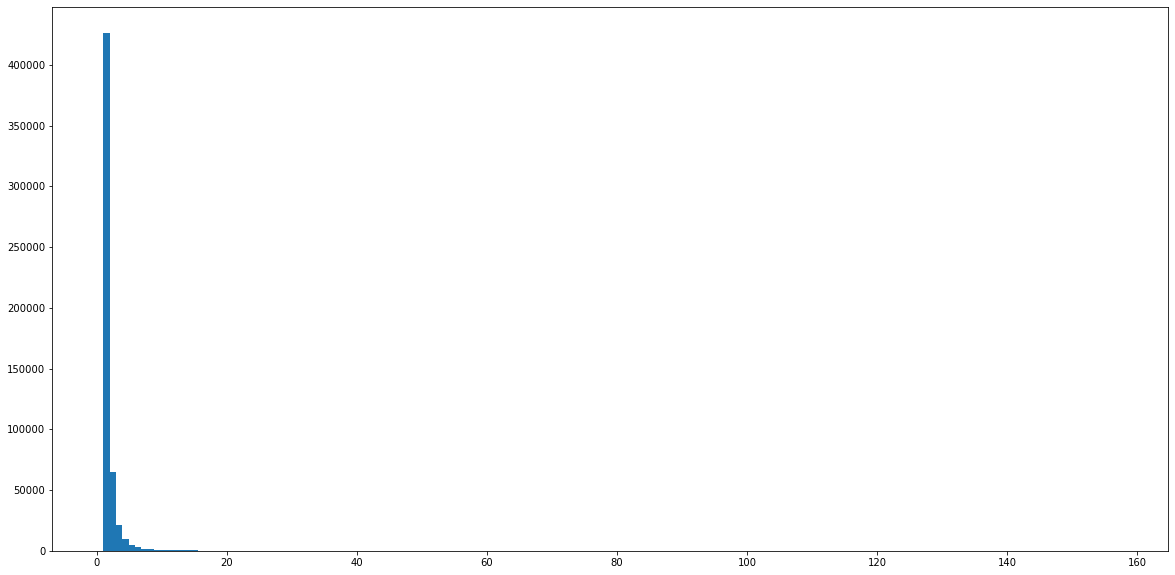

In [34]:
plt.figure(figsize=(20, 10))
plt.hist(qids.value_counts(), bins=160)

In [35]:
### to make this histogfram more clear , u can change y-scale to its log

Text(0, 0.5, 'Number of questions')

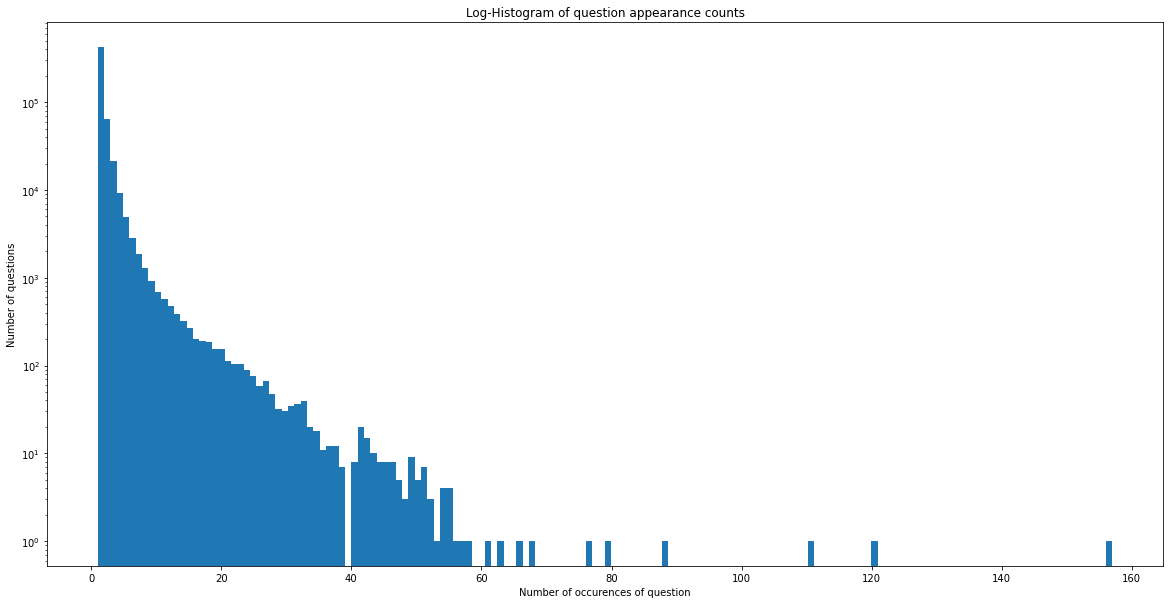

In [36]:
plt.figure(figsize=(20, 10))
plt.hist(qids.value_counts().values, bins=160)
plt.yscale('log')
plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

In [37]:
### from above histogram , there are very few questions 
#that occurs max times , it means we have less repeated questions..

In [38]:
print ('Maximum number of times a single question is \
        repeated: {}\n'.format(max(qids.value_counts()))) 

Maximum number of times a single question is repeated: 157



<h3> 3.2.5 Checking for NULL values </h3>

In [39]:
df.isnull().any()

id              False
qid1            False
qid2            False
question1        True
question2        True
is_duplicate    False
dtype: bool

In [40]:
## it means 2 features have NAN values
df.isnull().any().sum()

2

In [41]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [42]:
df['question2'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
404285    False
404286    False
404287    False
404288    False
404289    False
Name: question2, Length: 404290, dtype: bool

In [43]:
### Lets try to find out rows with null values in question2

df[df['question2'].isnull()]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0


In [44]:
# Filling the null values with ' '

In [45]:
df.fillna('',inplace=True)

### Text analysis
    

In [47]:
train_qs = pd.Series(df['question1'].tolist() + df['question2'].tolist())

In [48]:
train_qs

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
808575    How many keywords are there in PERL Programmin...
808576           Is it true that there is life after death?
808577                                    What's this coin?
808578    I am having little hairfall problem but I want...
808579        What is it like to have sex with your cousin?
Length: 808580, dtype: object

### WordCloud Analysis

In [63]:
## takes 1 min

(-0.5, 1439.5, 1079.5, -0.5)

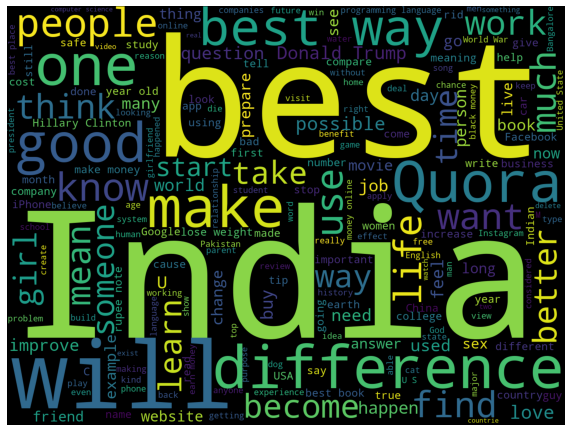

In [64]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs))
plt.figure(figsize=(10,8))
plt.imshow(cloud)
plt.axis('off')

## lets perform Semantic Analysis
    ie ,1) How many questions textual contents actually 
            belongs to interrogative sentences?
        2) How many questions textual contents actually holds fullstop?
        3) How many questions textual contents actually holds 
            some special keyword like maths , ml ,ai etc?

In [65]:
train_qs

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
808575    How many keywords are there in PERL Programmin...
808576           Is it true that there is life after death?
808577                                    What's this coin?
808578    I am having little hairfall problem but I want...
808579        What is it like to have sex with your cousin?
Length: 808580, dtype: object

#### ways to do it..
    1..using lambda
    2..using function

#### 1..using lambda

In [66]:
train_qs.apply(lambda x: '?' in x)

### need to explore below alternative , incomplete
## train_qs.str.contains('?')

0         True
1         True
2         True
3         True
4         True
          ... 
808575    True
808576    True
808577    True
808578    True
808579    True
Length: 808580, dtype: bool

In [67]:
qmarks=np.mean(train_qs.apply(lambda x: '?' in x))*100

In [68]:
qmarks

99.87385292735412

In [69]:
print('percentage of Questions with question marks: {}'.format(qmarks))

percentage of Questions with question marks: 99.87385292735412


#### 2..using function

In [70]:
def find_semantics(x ,symbol):
    return symbol in x

In [71]:
find_semantics(train_qs[0],'?')

True

In [72]:
train_qs.apply(find_semantics,args='?')

## Also as=>> train_qs.apply(find_semantics,args=('?'))
## ie in args , we have to pass values in the form of tuples..



0         True
1         True
2         True
3         True
4         True
          ... 
808575    True
808576    True
808577    True
808578    True
808579    True
Length: 808580, dtype: bool

In [73]:
np.mean(train_qs.apply(find_semantics,args='?'))*100

99.87385292735412

#### lets find all the questions that have 'math' as a substring or as a tag
       Ways to do it--
       1..using lambda approach
       2..using custom functions..

##### 1..using lambda approch

In [74]:
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))

Questions with [math] tags: 0.12%


##### 2..using custom functions..

In [75]:
## if we have to search math,in such case apply along with custom 
# function approach will not work as ,unfornately agrs will not support this..



### gives error in this-->> train_qs.apply(find_semantics,args='[math]')

In [76]:
find_semantics(train_qs[0],'[math]')

False

In [77]:
store_bool=[]
for i in train_qs.index:
    store_bool.append(find_semantics(train_qs[i],'[math]'))
pd.Series(store_bool)


### optimal code using list comprehension-->> 

# pd.Series([find_semantics(train_qs[i],'[math]') for i in train_qs.index])

0         False
1         False
2         False
3         False
4         False
          ...  
808575    False
808576    False
808577    False
808578    False
808579    False
Length: 808580, dtype: bool

In [78]:
np.mean(pd.Series(store_bool))*100

0.11736624700091518

#### lets find all the questions that have fullstop(.)
     Ways to do it--
       1..using lambda approach
       2..using custom functions..

##### 1..using lambda approach

In [79]:
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))

Questions with full stops: 6.31%


##### 2..using custom functions..

In [80]:
np.mean(train_qs.apply(find_semantics,args='.'))*100

6.308219347498083